## Problem Assignment: Numerical Schemes for the 1D Linear Advection Equation

### 1\. Problem Definition

You are tasked with numerically solving the 1D linear advection equation:

$$
\frac{\partial u}{\partial t} + \frac{\partial u}{\partial x} = 0
$$

This equation describes a wave $u(x, t)$ traveling to the right with a constant speed $c=1$.

* **Domain:** A periodic spatial domain, $x \in [0, 25.0]$.
* **Initial Condition ($t=0$):** The solution starts as a sum of two pulses:
$u(x, 0) = \exp(-20.0(x - 2)^2) + \exp(-(x - 5)^2)$
* **Exact Solution:** For this problem, the exact solution is the initial shape simply "advecting" or moving to the right. It is given by $u(x, t) = u(x-t, 0)$.

We will use the following Python function to represent the exact solution at any given time `t`:

-----


### 2\. Numerical Setup

All your simulations must use the following discretization parameters:

* **Grid Points:** `m = 501`
* **Spatial Grid:** `x = np.linspace(0, 25.0, m)`
* **Grid Spacing:** $\Delta x = 25.0 / (m - 1)$
* **Final Time:** `t_final = 17.0`
* **CFL Number:** $\nu = 0.8$ (Note: $\nu = c \frac{\Delta t}{\Delta x}$, and since $c=1$, $\nu = \frac{\Delta t}{\Delta x}$)
* **Time Step:** $\Delta t = \nu \cdot \Delta x$

-----



### 3\. Your Task: Implement and Compare

Your main task is to implement **five** different finite difference schemes to solve this problem. For each scheme, you will write a time-stepping loop that starts with the initial condition `U = u_true(x, 0)` and runs until `t = t_final`.

**Crucial:** You must correctly implement the **periodic boundary conditions** for each scheme. This means that for a grid point $U_i$, its right neighbor $U_{i+1}$ and left neighbor $U_{i-1}$ must "wrap around" at the boundaries.

* For $i=0$ (the first point), the left neighbor is $U_{m-1}$ (the last point).
* For $i=m-1$ (the last point), the right neighbor is $U_0$ (the first point).

Implement the following five methods (where $\nu = \Delta t / \Delta x$):

1.  **FTCS (Forward-Euler, Central-Space):**
2.  **Lax-Friedrichs:**
3.  **Upwind (First-Order):**
4.  **Lax-Wendroff:**
5.  **Beam-Warming:** 

-----



### 4\. Deliverables

You will submit your Jupyter Notebook as a pdf that completes the following:

1.  **Code:** A single script containing:

      * The setup (imports, parameters, initial condition).
      * A separate simulation loop for **each of the five methods**.
      * Store the final solution `U` from each method in a clearly named variable (e.g., `U_fe`, `U_lax_friedrichs`, etc.).

2.  **Plot:** A single, clear plot that visualizes the results at $t=17.0$. The plot must include:

      * The **exact solution** `u_true(x, t_final)` plotted as a solid black line (`'k'`).
      * The numerical results from **all five methods**. Plot each with a different style (e.g., `'ro'`, `'b--'`, `'g.'`, etc.) so they are distinguishable.
      * A clear **legend** identifying which line/marker corresponds to which method.
      * The plot limits set to zoom in on the solution:
          * `axes.set_xlim((15.0, 25.0))`
          * `axes.set_ylim((-0.1, 1.1))`

3.  **Analysis (Written):** In comments in your script or in a notebook markdown cell, answer the following questions:

      * **Stability:** Which (if any) methods failed to produce a stable solution? Based on what you know about numerical methods, why was this expected?
      * **Diffusion & Dispersion:** Compare the "good" solutions to the exact solution.
          * Which methods appear overly **diffusive** (smeared out)?
          * Which methods exhibit **dispersion** (spurious oscillations or "wiggles") near the sharp pulses?
      * **Conclusion:** Briefly state which method you think performed best and why.

-----


In [5]:
import numpy as np
import matplotlib.pyplot as plt

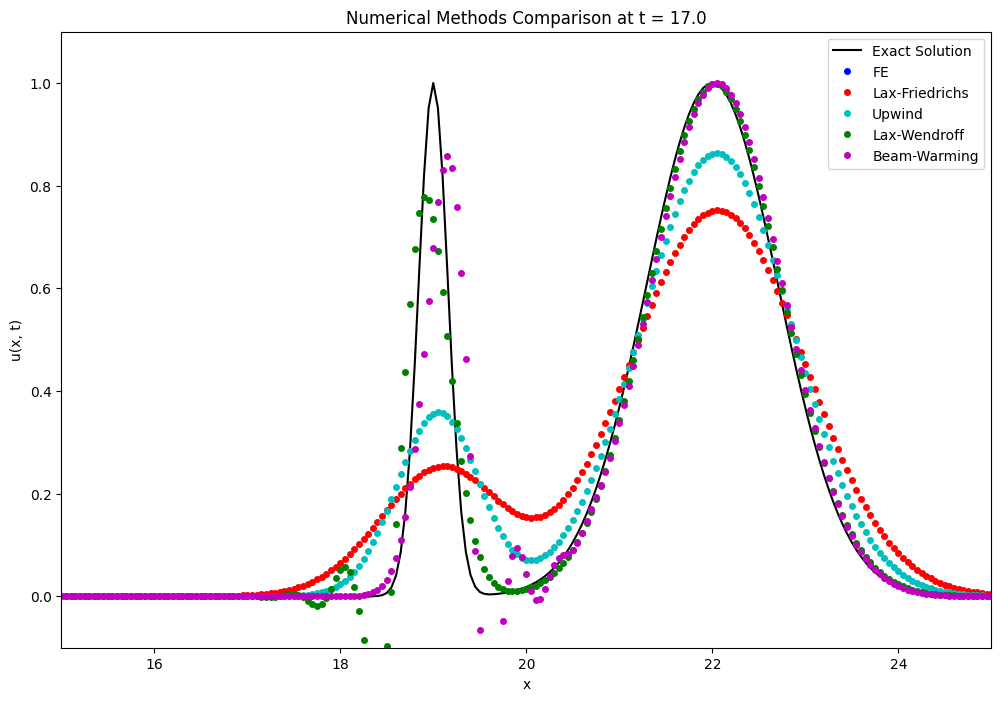

In [6]:
# --- 1. Problem Definition ---
u_true = lambda x, t: np.exp(-20.0 * ((x - t) - 2.0)**2) + np.exp(-((x - t) - 5.0)**2)

# --- 2. Numerical Setup ---
m = 501
x = np.linspace(0, 25.0, m)
delta_x = 25.0 / (m - 1)
cfl = 0.8 # This is our nu
delta_t = cfl * delta_x
t = 0.0
t_final = 17.0

# --- 3. Run Simulations ---

# Method 1: FE
U_fe = u_true(x, 0)
U_new = np.empty(U_fe.shape)
t = 0.0
while t < t_final:
    U_new[1:-1] = (U_fe[1:-1]- 0.5 * cfl * (U_fe[2:] - U_fe[:-2]))
    U_new[0] = (U_fe[0]- 0.5 * cfl * (U_fe[1] - U_fe[-1]))
    U_new[-1] = (U_fe[-1]- 0.5 * cfl * (U_fe[0] - U_fe[-2]))

    U_fe = U_new.copy()
    t += delta_t

# Method 2: Lax-Friedrichs
U_lax_friedrichs = u_true(x, 0)
U_new = np.empty(U_lax_friedrichs.shape)
t = 0.0
while t < t_final:
    # ... IMPLEMENT Lax-Friedrichs loop here ...
    # This is the one from your example
    U_new[0] = 0.5 * (U_lax_friedrichs[1] + U_lax_friedrichs[-1]) - cfl / 2.0 * (U_lax_friedrichs[1] - U_lax_friedrichs[-1])
    U_new[1:-1] = 0.5 * (U_lax_friedrichs[2:] + U_lax_friedrichs[:-2]) - cfl / 2.0 * (U_lax_friedrichs[2:] - U_lax_friedrichs[:-2])
    U_new[-1] = 0.5 * (U_lax_friedrichs[0] + U_lax_friedrichs[-2]) - cfl / 2.0 * (U_lax_friedrichs[0] - U_lax_friedrichs[-2])
    
    U_lax_friedrichs = U_new.copy()
    t += delta_t

# Method 3: Upwind
U_upwind = u_true(x, 0)
U_new = np.empty(U_upwind.shape)
t = 0.0
while t < t_final:
    U_new[0] = U_upwind[0]- cfl*(U_upwind[0] - U_upwind[-1])
    U_new[1:] = U_upwind[1:] - cfl*(U_upwind[1:] - U_upwind[:-1])

    U_upwind = U_new.copy()
    t += delta_t

# Method 4: Lax-Wendroff
U_lax_wendroff = u_true(x, 0)
U_new = np.empty(U_lax_wendroff.shape)
t = 0.0
while t < t_final:
    U_new[0] = U_lax_wendroff[0]- cfl/2 *(U_lax_wendroff[1]-U_lax_wendroff[-1]) + (cfl**2)/2 *(U_lax_wendroff[1]-2*U_lax_wendroff[0]+U_lax_wendroff[-1])
    U_new[1:-1] = U_lax_wendroff[1:-1] - cfl/2 *(U_lax_wendroff[2:]-U_lax_wendroff[:-2]) + (cfl**2)/2 *(U_lax_wendroff[2:]-2*U_lax_wendroff[1:-1]+U_lax_wendroff[:-2])
    U_new[-1] = U_lax_wendroff[-1]- cfl/2 *(U_lax_wendroff[0]-U_lax_wendroff[-2]) + (cfl**2)/2 *(U_lax_wendroff[0]-2*U_lax_wendroff[-1]+U_lax_wendroff[-2])

    U_lax_wendroff = U_new.copy()
    t += delta_t

# Method 5: Beam-Warming
U_beam_warming = u_true(x, 0)
U_new = np.empty(U_beam_warming.shape)
t = 0.0
while t < t_final:
    U_new[2:] = (U_beam_warming[2:]- 0.5 * cfl * (3*U_beam_warming[2:] - 4*U_beam_warming[1:-1] + U_beam_warming[:-2])+ 0.5 * cfl**2 * (U_beam_warming[2:] - 2*U_beam_warming[1:-1] + U_beam_warming[:-2]))
    U_new[0] = (U_beam_warming[0]- 0.5 * cfl * (3*U_beam_warming[0]- 4*U_beam_warming[-1]+ U_beam_warming[-2])+ 0.5 * cfl**2 * (U_beam_warming[0]- 2*U_beam_warming[-1]+ U_beam_warming[-2]))
    U_new[1] = (U_beam_warming[1]- 0.5 * cfl * (3*U_beam_warming[1]- 4*U_beam_warming[0]+ U_beam_warming[-1])+ 0.5 * cfl**2 * (U_beam_warming[1]- 2*U_beam_warming[0]+ U_beam_warming[-1]))
    U_beam_warming = U_new.copy()
    t += delta_t

# --- 4. Plotting ---
fig = plt.figure(figsize=(12, 8))
axes = fig.add_subplot(1, 1, 1)

# Plot the exact solution
axes.plot(x, u_true(x, t_final), 'k', label='Exact Solution')

# Plot your numerical solutions
axes.plot(x, U_fe, 'bo', label='FE', markersize=4)
axes.plot(x, U_lax_friedrichs, 'ro', label='Lax-Friedrichs', markersize=4)
axes.plot(x, U_upwind, 'co', label='Upwind', markersize=4)
axes.plot(x, U_lax_wendroff, 'go', label='Lax-Wendroff', markersize=4)
axes.plot(x, U_beam_warming, 'mo', label='Beam-Warming', markersize=4)
# Set limits and labels
axes.set_xlim((15.0, 25.0))
axes.set_ylim((-0.1, 1.1))
axes.set_xlabel('x')
axes.set_ylabel('u(x, t)')
axes.set_title(f'Numerical Methods Comparison at t = {t_final:.1f}')
axes.legend()

plt.show()

## Analysis
### About stability
Which are stables and why you expect that?

The FE discretization is clearly non-convergent. This was expected, since its not stable for any fixed mesh ratio $k/h$.

We know that the Lax-Friedrichs is Lax-Ritchmyer stable, but its a discretization of the advetion-diffusion equation. This implies that the amplitudes are greatly reduced.

The Lax-Wendroff is also a dissipative scheme, although is the only one of second order accuracy. It its indeed accurate, but introduces some unphysical oscillations.

Upwind: 

Beam-Warming:

## Analysis
### Stability
Forward Euler failed to produce a stable solution. The method is conditionally stable, and for linear advection its stability region is very small; with the CFL used, it becomes unconditionally unstable and amplifies all modes. This behaviour is expected: FE has a stability region that does not include the imaginary axis, so pure advection (whose eigenvalues are purely imaginary) inevitably leaves the stability region.

### Diffusive methods
- Lax–Friedrichs places almost the entire imaginary axis well inside its stability disc. Every eigenvalue is strongly damped, so the method injects a large positive effective viscosity. This explains the heavy smearing of both pulses: peak heights collapse and the profiles become rounded.

- Upwind also keeps the imaginary axis strictly inside the stability region, but much closer to the boundary than Lax–Friedrichs. The damping is weaker but still systematic, producing noticeable smoothing while retaining more structure than Lax–Friedrichs.


### Dispersive methods

- The stability boundary of Lax–Wendroff comes very close to the imaginary axis. Since all eigenvalues of the advection operator lie on that axis, they end up sitting on parts of the boundary where the scheme moves from light damping to almost no damping. As a result, nearby eigenvalues are treated differently: some are softened a bit, while others are barely affected. This uneven behaviour across the eigenvalues produces the small oscillations that appear near steep gradients.

- Beam–Warming’s stability boundary cuts through the imaginary axis even more sharply. Several eigenvalues fall on segments of the boundary where the scheme’s response changes quickly. This makes the treatment of neighbouring eigenvalues even less consistent than in Lax–Wendroff. Because of this stronger mismatch, the method shows more noticeable wiggles, including clear overshoots and undershoots around the narrow pulse.

### Best method overall
Lax–Wendroff delivers the best overall balance. It preserves the general shape of the solution without the excessive smearing of Lax–Friedrichs/Upwind and without the strong oscillations observed in Beam–Warming. It captures the pulse location and amplitude more accurately while keeping dispersive artefacts manageable.